<a href="https://colab.research.google.com/github/SukhadTamboli/Thyroid-Detection/blob/main/Thyroid_Final_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from  xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.regression import regplot
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("E:\\data.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
data.dtypes

PTN. NAME     object
Sex           object
Age            int64
TSH          float64
T3           float64
T4           float64
Free T3      float64
Free T4      float64
Result         int64
dtype: object

In [ ]:
data.shape

(226, 9)

In [ ]:
data['Sex'] = data['Sex'].map({'F': 1, 'M': 0})

In [ ]:
data.isna().sum()

PTN. NAME      0
Sex            0
Age            0
TSH            5
T3           204
T4           204
Free T3      208
Free T4      158
Result         0
dtype: int64

In [ ]:
data1 = data.drop(columns='PTN. NAME')

In [ ]:
data1['T3'].fillna(data1['T3'].mean(), inplace=True)
data1['T4'].fillna(data1['T4'].mean(), inplace=True)
data['TSH'].fillna(data1['TSH'].mean(), inplace=True)
data1['Free T3'].fillna(data1['Free T3'].mean(), inplace=True)
data1['Free T4'].fillna(data1['Free T4'].mean(), inplace=True)


In [ ]:
#from google.colab import files
#data1.to_csv('data.csv') 
#files.download('data.csv')

In [ ]:
#fill all null values 
data1 = data1.interpolate(method = 'spline', order = 3)
display(data1.isna().sum())


Sex        0
Age        0
TSH        0
T3         0
T4         0
Free T3    0
Free T4    0
Result     0
dtype: int64

In [ ]:
#adding xgb classifier to boost classification 
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01)}

In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from boruta import BorutaPy

In [ ]:
#define the features
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

NameError: ignored

In [ ]:
# show the most important features
most_important = data1.columns[:-1][feat_selector.support_].tolist()
most_important

['Age', 'TSH']

In [ ]:
X_top = data1[most_important]
y = data1['Result']

In [ ]:
X = data1[most_important]
y = data1.iloc[:,-1]

In [ ]:
# calculate confusion matrix and classifiers 
corr_values = abs(data1[data1.columns[0:]].corr()['Result'][:])
corr_values = corr_values.drop('Result')
corr_values = corr_values[corr_values > 0.04]

NameError: ignored

In [ ]:
# classifying train and test
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['Result']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(data)

In [ ]:
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01)}

In [ ]:
# calculating accuracy ,precision,recall,F1score of classifier 
def classification(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "F1Score"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "F1Score":round(fs, 4)}, ignore_index=True)
            print("Confusion matrix for: ", name)
            display(confusion_matrix(y_test, y_pred))
  res.set_index("F1Score", inplace=True)
  res.sort_values(by="F1Score", ascending=False, inplace=True)   
  return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

Confusion matrix for:  XGBClassifier


array([[59,  1],
       [ 0,  8]])

,Classifier,Accuracy,Precision,Recall
F1Score,,,,
0.9664,XGBClassifier,0.9853,0.9444,0.9917


In [ ]:
# importing all required classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
classifiers1 = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(),
    "Naive Bayes" : GaussianNB(),
    "SVM" : SVC(),
    "SGDClassifier":SGDClassifier(),
    "Linear Discriminant Analysis" : LinearDiscriminantAnalysis(),
    "MLPClassifier" : MLPClassifier()
}
classifiers1

{'Random Forest': RandomForestClassifier(),
 'Logistic Regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
 'Decision Tree': DecisionTreeClassifier(),
 'Naive Bayes': GaussianNB(),
 'SVM': SVC(),
 'SGDClassifier': SGDClassifier(),
 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
 'MLPClassifier': MLPClassifier()}

In [ ]:
# calculate confusion matrix and classifiers 
corr_values = abs(data1[data1.columns[0:]].corr()['Result'][:])
corr_values = corr_values.drop('Result')
corr_values = corr_values[corr_values > 0.04]

X_train1, X_test1, y_train1, y_test1 = holdout(data1)
display(classification(classifiers1,X_train1, X_test1, y_train1, y_test1))

Confusion matrix for:  Random Forest


array([[60,  0],
       [ 0,  8]])

Confusion matrix for:  Logistic Regression


array([[60,  0],
       [ 6,  2]])

Confusion matrix for:  K-Nearest Neighbors


array([[60,  0],
       [ 5,  3]])

Confusion matrix for:  Decision Tree


array([[60,  0],
       [ 0,  8]])

Confusion matrix for:  Naive Bayes


array([[59,  1],
       [ 5,  3]])

Confusion matrix for:  SVM


array([[60,  0],
       [ 5,  3]])

Confusion matrix for:  SGDClassifier


array([[60,  0],
       [ 7,  1]])

Confusion matrix for:  Linear Discriminant Analysis


array([[59,  1],
       [ 4,  4]])

Confusion matrix for:  MLPClassifier


array([[60,  0],
       [ 7,  1]])

,Classifier,Accuracy,Precision,Recall
F1Score,,,,
1.0000,Random Forest,1.0000,1.0000,1.0000
1.0000,Decision Tree,1.0000,1.0000,1.0000
0.7874,Linear Discriminant Analysis,0.9265,0.8683,0.7417
0.7527,K-Nearest Neighbors,0.9265,0.9615,0.6875
0.7527,SVM,0.9265,0.9615,0.6875
0.7258,Naive Bayes,0.9118,0.8359,0.6792
0.6762,Logistic Regression,0.9118,0.9545,0.6250
0.5836,SGDClassifier,0.8971,0.9478,0.5625
0.5836,MLPClassifier,0.8971,0.9478,0.5625


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Decision Tree AUC score: 1.0


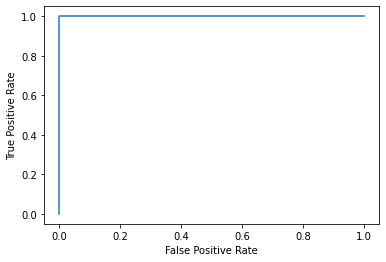

In [ ]:
plot_roc_curve(y_test, y_pred)
print(f'Decision Tree AUC score: {roc_auc_score(y_test, y_pred)}')

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


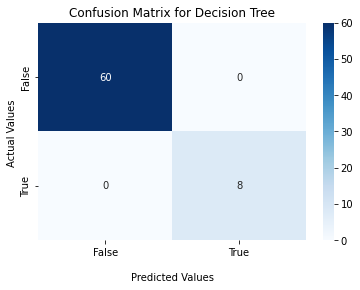

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

1.0

In [ ]:
# create regressor object
regressor = RandomForestClassifier()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred1 = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Random Forest AUC score: 1.0


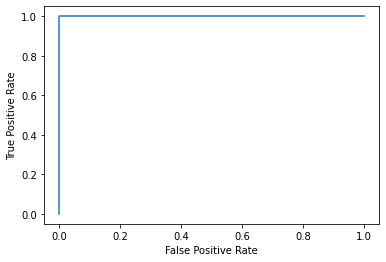

In [ ]:
plot_roc_curve(y_test, y_pred1)
print(f'Random Forest AUC score: {roc_auc_score(y_test, y_pred1)}')

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)

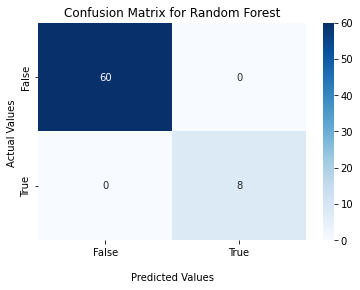

In [ ]:
ax = sns.heatmap(cm1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred1)

1.0

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train) 

y_pred2 = model.predict(X_test)

Logistic Regression AUC score: 0.625


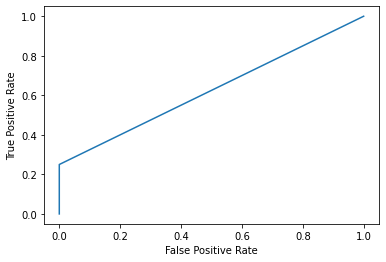

In [ ]:
plot_roc_curve(y_test, y_pred2)
print(f'Logistic Regression AUC score: {roc_auc_score(y_test, y_pred2)}')

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)

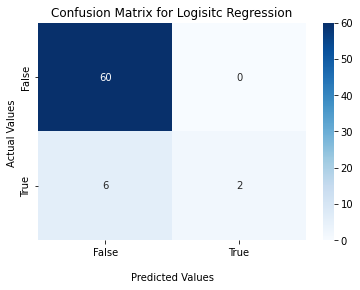

In [ ]:
ax = sns.heatmap(cm2, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Logisitc Regression');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred2)

0.4767312946227961

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

y_pred3 = knn.predict(X_test)

K-Nearest Neighbor AUC score: 0.6875


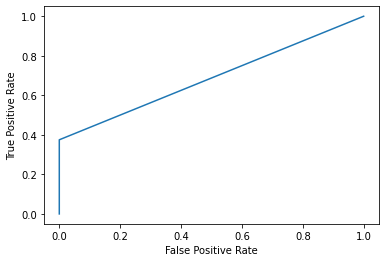

In [ ]:
plot_roc_curve(y_test, y_pred3)
print(f'K-Nearest Neighbor AUC score: {roc_auc_score(y_test, y_pred3)}')

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)

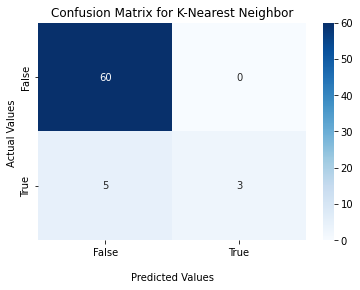

In [ ]:
ax = sns.heatmap(cm3, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for K-Nearest Neighbor');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred3)

0.5883484054145521

In [ ]:
svm = SVC() 
svm.fit(X_train, y_train) 

y_pred4 = svm.predict(X_test)

SVC AUC score: 0.6875


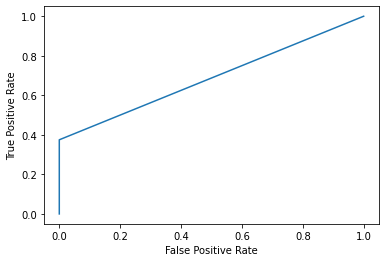

In [ ]:
plot_roc_curve(y_test, y_pred4)
print(f'SVC AUC score: {roc_auc_score(y_test, y_pred4)}')

In [ ]:
cm4 = confusion_matrix(y_test, y_pred4)

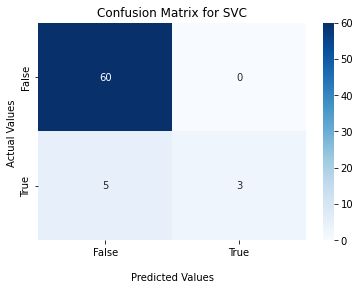

In [ ]:
ax = sns.heatmap(cm4, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for SVC');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred4)

0.5883484054145521

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred5 = gnb.predict(X_test)

Naive Bayes AUC score: 0.6791666666666667


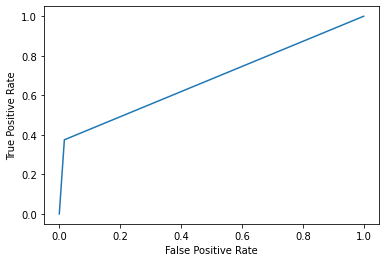

In [ ]:
plot_roc_curve(y_test, y_pred5)
print(f'Naive Bayes AUC score: {roc_auc_score(y_test, y_pred5)}')

In [ ]:
cm5 = confusion_matrix(y_test, y_pred5)

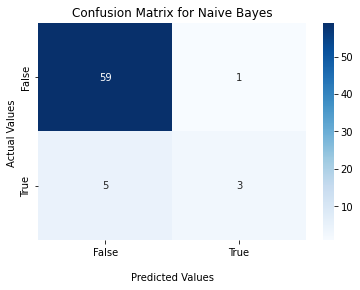

In [ ]:
ax = sns.heatmap(cm5, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred5)

0.4906681244317113

In [ ]:
clf3 = SGDClassifier()
clf3.fit(X_train, y_train)
y_pred6 = clf3.predict(X_test)

SGDClassifier AUC score: 0.5625


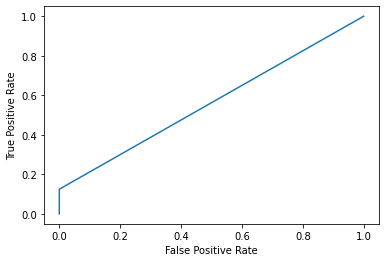

In [ ]:
plot_roc_curve(y_test, y_pred6)
print(f'SGDClassifier AUC score: {roc_auc_score(y_test, y_pred6)}')

In [ ]:
cm6 = confusion_matrix(y_test, y_pred6)

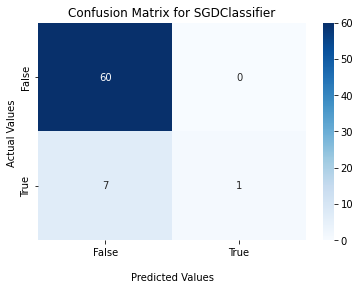

In [ ]:
ax = sns.heatmap(cm6, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for SGDClassifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred6)

0.3345748025591029

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred7 = lda.predict(X_test)

LinearDiscriminantAnalysis AUC score: 0.7416666666666666


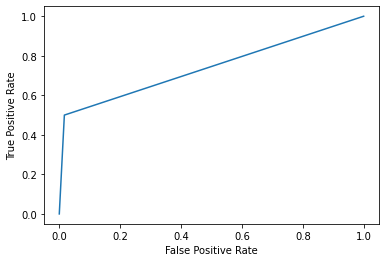

In [ ]:
plot_roc_curve(y_test, y_pred7)
print(f'LinearDiscriminantAnalysis AUC score: {roc_auc_score(y_test, y_pred7)}')

In [ ]:
cm7 = confusion_matrix(y_test, y_pred7)

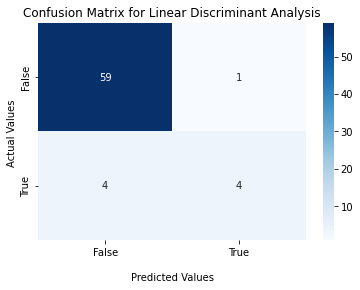

In [ ]:
ax = sns.heatmap(cm7, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Linear Discriminant Analysis');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred7)

0.5966396198534221

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred8 = mlp.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier AUC score: 0.7416666666666666


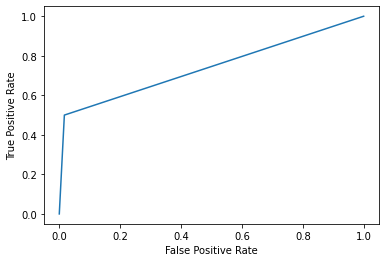

In [ ]:
plot_roc_curve(y_test, y_pred8)
print(f'MLPClassifier AUC score: {roc_auc_score(y_test, y_pred8)}')

In [ ]:
cm8 = confusion_matrix(y_test, y_pred8)

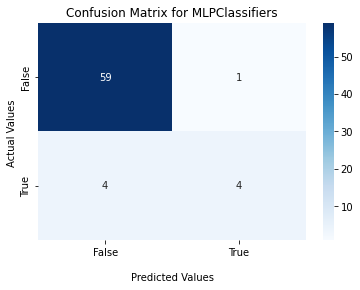

In [ ]:
ax = sns.heatmap(cm8, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for MLPClassifiers');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred8)

0.5966396198534221

In [ ]:
# importing classifiers table as csv
book11 = pd.read_csv("/content/Result LMH.csv")
book11

,F1Score,Classifier,Accuracy,Precision,Recall
0,0.9664,Random Forest,0.9853,0.9444,0.9917
1,0.9665,Decision Tree,0.9853,0.9444,0.9917
2,0.8407,K-Nearest Neighbor,0.9412,0.8925,0.8042
3,0.7527,Naïve Bayes,0.9265,0.9615,0.6875
4,0.7527,SVM,0.9265,0.9615,0.6875
5,0.7258,SGDClassifier,0.9118,0.8359,0.6792
6,0.5836,Logisitic Regression,0.8971,0.9478,0.5625
7,0.7874,Linear Discriminant Analysis,0.9265,0.8683,0.8417
8,0.5836,MLP Classifier,0.8971,0.9478,0.5625


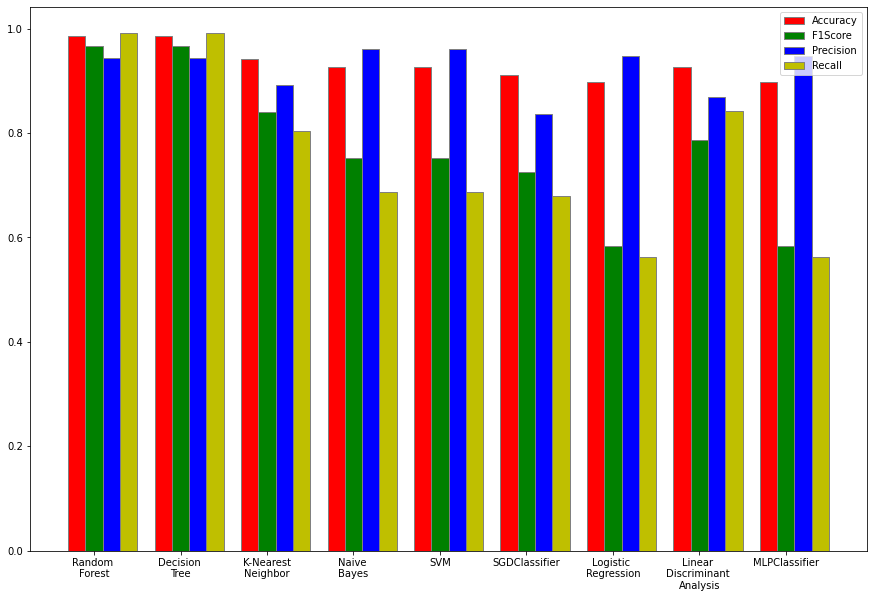

In [ ]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 10))

# set height of bar
Accuracy =book11['Accuracy']
F1Score=book11['F1Score']
Precision=book11['Precision']
Recall=book11['Recall']

# Set position of bar on X axis
br1 = np.arange(len(Recall))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4=[x+ barWidth for x in br3]
br5=[x+ barWidth for x in br4]


# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth,
	edgecolor ='grey', label ='Accuracy')
plt.bar(br2, F1Score, color ='g', width = barWidth,
		edgecolor ='grey', label ='F1Score')
plt.bar(br3, Precision, color ='b', width = barWidth,
		edgecolor ='grey', label ='Precision')
plt.bar(br4, Recall, color ='y', width = barWidth,
		edgecolor ='grey', label ='Recall')


# Adding Xticks
plt.xticks([r + barWidth for r in range(len(F1Score))],
		['Random \nForest', 'Decision \nTree', 'K-Nearest\nNeighbor', 'Naive \nBayes', 'SVM','SGDClassifier','Logistic \nRegression','Linear \nDiscriminant \nAnalysis','MLPClassifier'])

plt.legend()
plt.show()